# Exercise 2

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv

np.random.seed(1234)

In [10]:
def make_data(n, p, mean=0, cov=1):
    mean_vector = np.full((p,), mean)
    
    cov_diag = np.full((p,), cov)
    cov_matrix = np.diagflat(cov_diag)
    
    observations_x = np.random.multivariate_normal(mean_vector, cov_matrix, n)
    
    observations_y = np.random.randn(n)
    
    return observations_x, observations_y

In [17]:
def linear_regression(train_X, train_Y, test_X, test_Y):
    regression_model = Ridge(alpha=1)
    regression_model.fit(train_X, train_Y)

    train_results = regression_model.predict(train_X)
    test_results = regression_model.predict(test_X)

    train_error = mean_squared_error(train_Y, train_results)
    test_error = mean_squared_error(test_Y, test_results)
    parameters_norm = np.linalg.norm(regression_model.coef_)
    
    return train_error, test_error, parameters_norm

In [18]:
def test_regression(train_X, train_Y, test_X, test_Y, p):
    train_X = train_X[:,:p]
    test_X = test_X[:,:p]
    
    train_error, test_error, parameters_norm = linear_regression(train_X, train_Y, test_X, test_Y)
    
    return train_error, test_error, parameters_norm

In [19]:
n_train = 200
n_test = 100
max_features = 1000

train_X, train_Y = make_data(n_train, max_features, mean=0, cov=1)
test_X, test_Y = make_data(n_test, max_features, mean=0, cov=1)

ps = []
train_errors = []
test_errors = []
parameters_norms = []
with open('linear_regression_results.csv', 'w', newline='') as fout:
    writer = csv.DictWriter(fout, fieldnames=['# parameters', 'train loss', 'test loss', 'parameters norm'])
    writer.writeheader()
    for p in range(1, max_features, 50):
        train_error, test_error, parameters_norm = test_regression(train_X, train_Y, test_X, test_Y, p)
        ps.append(p)
        train_errors.append(train_error)
        test_errors.append(test_error)
        parameters_norms.append(parameters_norm)

        print('p: {} | train loss: {:.5f}; test loss: {:.5f}; norm: {:.5f}'.format(p, train_error, test_error, parameters_norm))

        writer.writerow({
            '# parameters': p,
            'train loss': train_error,
            'test loss': test_error,
            'parameters norm': parameters_norm
        })

p: 1 | train loss: 1.02738; test loss: 0.78792; norm: 0.03214
p: 51 | train loss: 0.80603; test loss: 1.17739; norm: 0.53848
p: 101 | train loss: 0.47455; test loss: 2.51001; norm: 1.25858
p: 151 | train loss: 0.28786; test loss: 4.59290; norm: 1.78177
p: 201 | train loss: 0.07455; test loss: 9.75305; norm: 3.09410
p: 251 | train loss: 0.00503; test loss: 6.66130; norm: 2.34356
p: 301 | train loss: 0.00089; test loss: 4.09926; norm: 1.77666
p: 351 | train loss: 0.00021; test loss: 2.70466; norm: 1.34524
p: 401 | train loss: 0.00006; test loss: 1.67635; norm: 1.07647
p: 451 | train loss: 0.00004; test loss: 1.34643; norm: 0.98309
p: 501 | train loss: 0.00002; test loss: 1.37418; norm: 0.85831
p: 551 | train loss: 0.00002; test loss: 1.32055; norm: 0.81204
p: 601 | train loss: 0.00001; test loss: 1.35417; norm: 0.76028
p: 651 | train loss: 0.00001; test loss: 1.32115; norm: 0.71828
p: 701 | train loss: 0.00001; test loss: 1.26396; norm: 0.67947
p: 751 | train loss: 0.00001; test loss: 1.

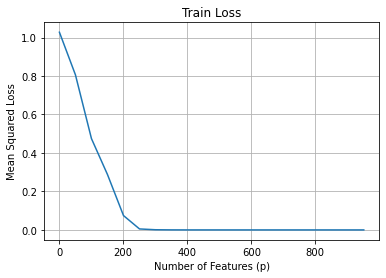

In [20]:
fig, ax = plt.subplots()
ax.plot(ps, train_errors)

ax.set(xlabel='Number of Features (p)', ylabel='Mean Squared Loss',
       title='Train Loss')
ax.grid()

(0.0, 30.0)

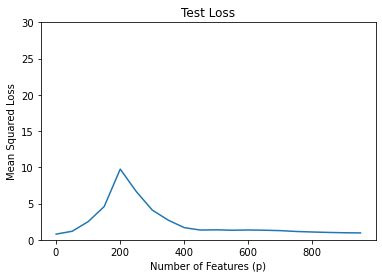

In [21]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Mean Squared Loss')
plt.title('Test Loss')
plt.plot(ps, test_errors)
plt.ylim(0, 30)

(0.0, 5.0)

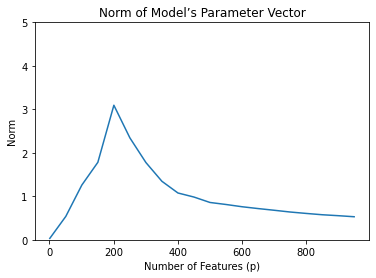

In [22]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Norm')
plt.title('Norm of Model’s Parameter Vector')
plt.plot(ps, parameters_norms)
plt.ylim(0, 5)